# SVD (Singular Value Decomposition)


SVD 역시 PCA와 유사한 행렬 분해 기법을 이용 <br>

PCA의 경우 정방행렬(즉, 행과 열의 크기가 같은 행렬)만을 고유벡터로 분해할 수 있지만, <br>
SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있음 <br>
=> 일반적으로 SVD는 m x n 크기의 행렬 A를 다음과 같이 분해하는 것을 의미 <br>

SVD는 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이벡터 (singular vector)이며, 
모든 특이벡터는 서로 직교하는 성질을 가진다.

Σ는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0
0이 아닌 값이 바로 행렬 A의 특이값

=> SVD는 A의 차원이 mxn일 때, U의 차원이 mxm / Σ의 차원이 mxn / V의 transpose의 차원이 nxn 으로 분해

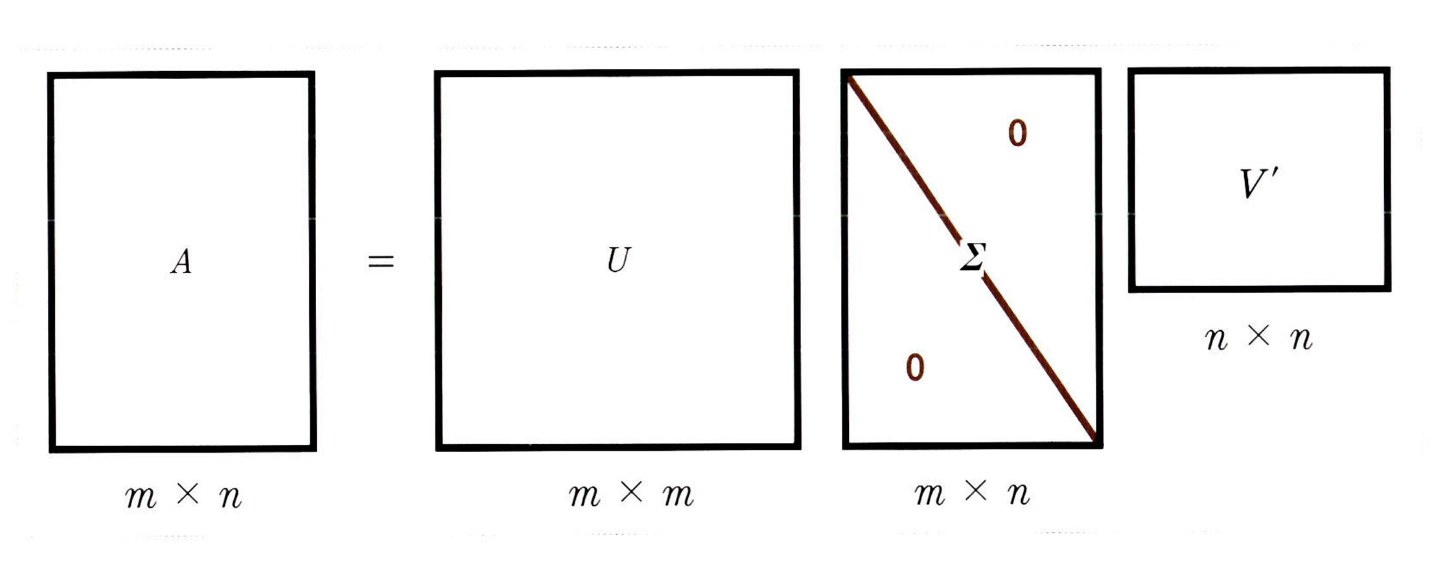

In [2]:
Image("/Users/ijiseon/Desktop/1.png")

하지만 일반적으로 다음과 같이 Σ의 비대각인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고,<br>
제거된 Σ에 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용 

=> 이렇게 컴팩트한 형태로 SVD를 적용하면 A의 차원이 mxn일 때, U의 차원을 mxp, Σ의 차원을 pxp, V의 transpose의 차원을 pxn으로 분해 

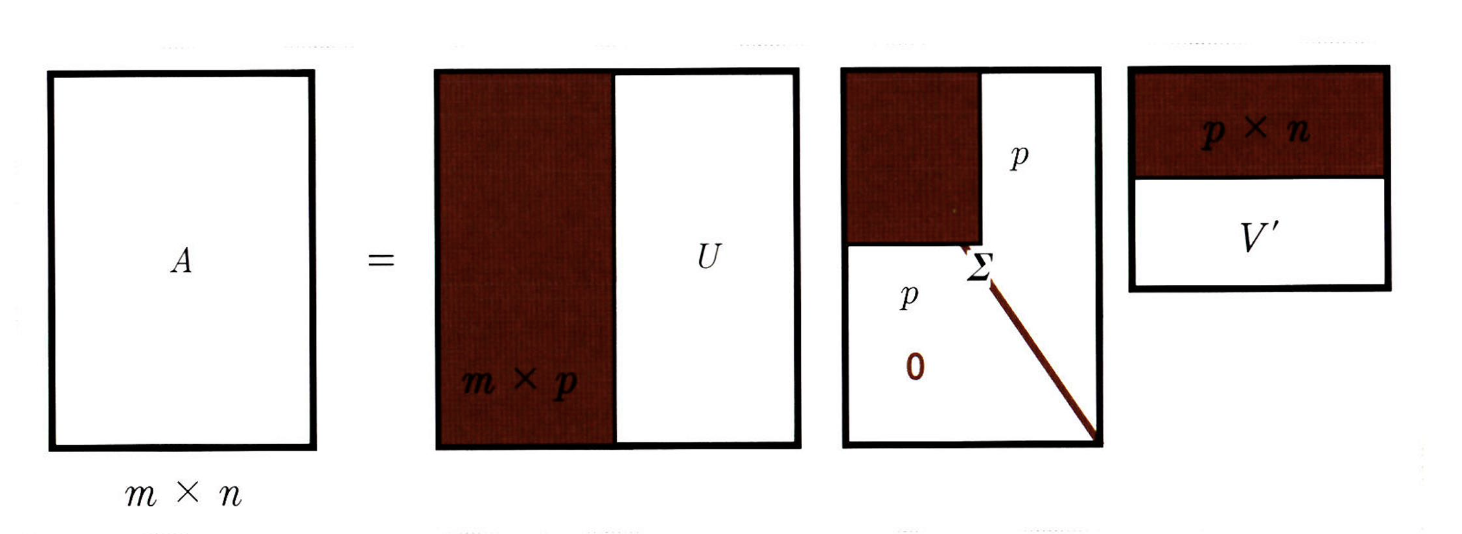

In [4]:
Image("/Users/ijiseon/Desktop/스크린샷 2023-11-24 12.37.35.png")

Truncated SVD는 Σ의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것 

### 넘파이의 SVD를 통한 SVD로 분해 이해 

+ sigma 행렬의 경우, 행렬의 대각에 위치한 값만 0이 아니고, 그렇지 않은 경우는 모두 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현

In [5]:
# 넘파이의 svd 모듈 임포트 

import numpy as np
from numpy.linalg import svd

#4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [6]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print("U matrix:\n", np.round(U,3))
print("Sigma Value;\n", np.round(Sigma,3))
print("V transpose matrix:\n",np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value;
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [8]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U,Sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [9]:
#로우 간 의존성이 있을 경우 Sigma 값이 어떻게 변하고, 이에 따른 차원 축소가 진행될 수 있는지

a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [10]:
# 다시 SVD를 수행해 Sigma 값 확인

U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print("Sigma Value:\n", np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


> Sigma 값 중 2개가 0 => 선형 독립인 로우 벡터의 개수가 2개 (행렬의 랭크가 2)

> 분해된 U, Sigma, Vt를 이용해 다시 원본 행렬로 복원할 때는 전체 데이터 이용하지 않고 Sigma의 0에 대응되는 U, sigma, Vt의 데이터를 제외하고 복원 <br>
= 즉, 시그마의 경우 앞의 2개 요소만 0이 아니므로 U 행렬 중 선행 두 개의 열만 추출하고, Vt의 경우는 선행 두 개의 행만 추출해 복원 

In [11]:
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

a_ = np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


### Truncated SVD - 사이파이 모듈

Σ 행렬에 있는 대각 원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식<br>
-> 이렇게 분해하면 인위적으로 더 작은 차원의 U, Σ, Vt 로 분해하기 때문에 원본 행렬을 정확하게 다시 원복할 수는 없음<br>
하지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있음 <br>
(당연한 얘기지만, 원래 차원의 차수에 가깝게 잘라낼수록 원본 행렬에 더 가깝게 복원할 수 있음)<br>


#### - 사이파이 모듈
1. 임의의 원본 행렬을 Normal SVD로 분해해 분해된 행렬의 차원과 Sigma 행렬 내의 특이값을 확인<br>
2. 다시 Truncated SVD로 분해해 분해된 행렬의 차원, Sigma 행렬 내의 특이값, 그리고 Truncated SVD로 분해된 행렬의 내적을 계산하여 다시 복원된 데이터와 원본 데이터를 비교 <br>

In [14]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

#원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print("원본 행렬:\n", matrix)

U, Sigma, Vt = svd(matrix, full_matrices=False)
print("\n분해 행렬 차원:", U.shape, Sigma.shape, Vt.shape)
print("\nSigma값 행렬:", Sigma)

#Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print("\nTruncated SVD 분해 행렬 차원:", U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print("\nTruncated SVD Sigma값 행렬:", Sigma_tr)

matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)),Vt_tr) #output of TruncatedSVD

print("\nTruncated SVD 분해 후 복원 행렬:\n", matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0

### 사이킷런 TruncatedSVD 클래스를 이용한 변환

사이킷런의 TruncatedSVD 클래스는 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt 행렬을 반환하지는 않습니다

사이킷런의 TruncatedSVD 클래스는 PCA 클래스와 유사하게 fit()와 transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트 (즉, Truncated SVD의 K 컴포넌트 수)로 차원을 축소해 변환합니다 

Text(0, 0.5, 'TruncatedSVD Component 2')

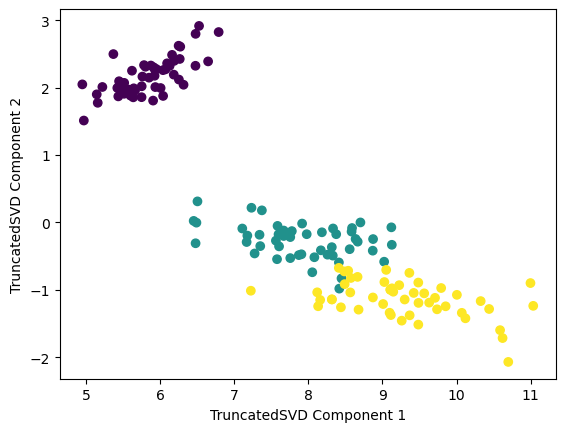

In [4]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs =iris.data

#2개의 주요 컴포넌트로 TruncatedSVD 변환

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

#산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel("TruncatedSVD Component 1")
plt.ylabel("TruncatedSVD Component 2")

> Truncated SVD 변환 역시 PCA와 유사하게 변환 후에 (품종별로) 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음을 알 수 있음 <br>

> 사이킷런의 TruncatedSVD와 PCA 클래스 구현을 조금 더 자세히 들여다보면 두 개 클래스 모두 SVD를 이용해 행렬을 분해. <br>
=> 붓꽃 데이터를 스케일링으로 변환한 뒤에 TruncatedSVD와 PCA 클래스 변환을 해보면 두 개가 거의 동일함을 알 수 있음

Text(0.5, 1.0, 'PCA Transformed')

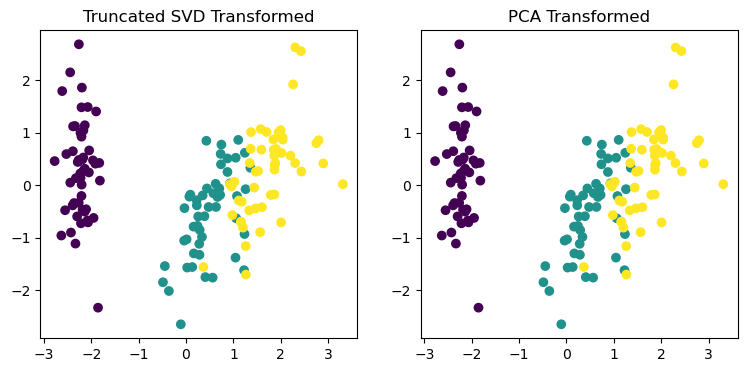

In [5]:
from sklearn.preprocessing import StandardScaler

#붓꽃데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

#스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)


#스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

#TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4),ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title("Truncated SVD Transformed")
ax2.set_title("PCA Transformed")

In [6]:
print((iris_pca- iris_tsvd).mean())
print((pca.components_-tsvd.components_).mean())

2.342923309065862e-15
2.7755575615628914e-17


> 두 개의 변환 행렬 값과 원본 속성별 컴포넌트 비율값을 비교해보면 거의 같음 <br>
= 즉, 데이터 세트가 스케일링ㅇ으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행<br>
이는 PCA가 SVD 알고리즘으로 구현됐음을 의미. <br>
**하지만 PCA는 밀집 행렬에 대한 변환만 가능하며 SVD는 희소 행렬에 대한 변환도 가능**<br>


> SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용됨. 또한 텍스트의 토픽 모델링 기법인 LSA의 기반 알고리즘

# NMF (Non-Negative Matrix Factorization)

NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형 <br>
; NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭<br>

행렬 분해는 일반적으로 SVD와 같은 행렬 분해 기법을 통칭 <br>
-> 이처럼 행렬 분해를 하게 되면 일반적으로 길고 가는 행렬 W(즉, 원본 행렬의 행 크기와 같고 열 크기보다 작은 행렬)와 <br>
작고 넓은 행렬 H(원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬)로 분해<br>





**이렇게 분해된 행렬은 잠재 요소를 특성으로 가지게 됨.**<br>
- **분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응**<br>
- **분해 행렬 H는 이 잠재 요소가 원본 열로 어떻게 구성됐는지를 나타내는 행렬**<br>

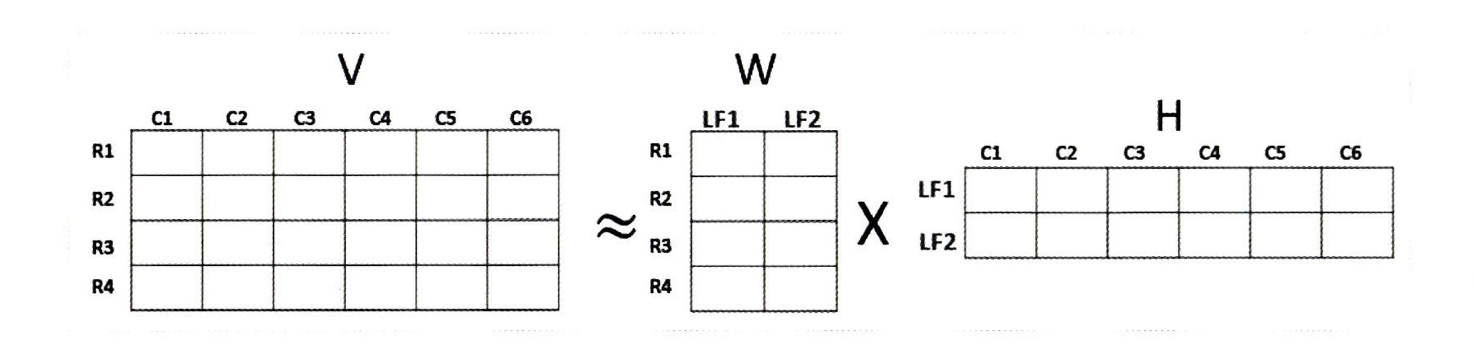

In [4]:
from IPython.display import Image
Image("/Users/ijiseon/Desktop/스크린샷 2023-11-25 18.14.16.png")

/Users/ijiseon/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

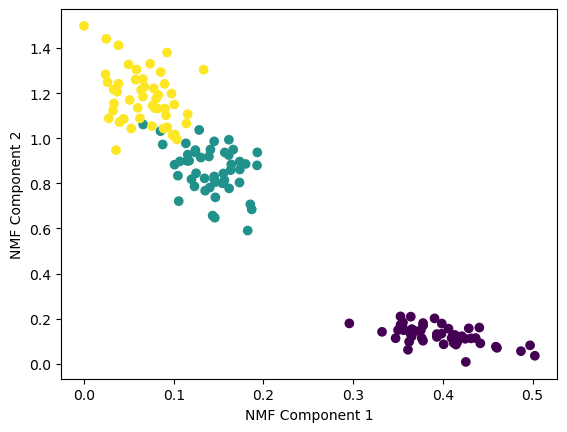

In [2]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel("NMF Component 1")
plt.ylabel("NMF Component 2")

> NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 잘 사용됨 <br>

> 영화 추천과 같은 추천 영역에 활발하게 적용<br>
사용자의 상품 (예:영화) 평가 데이터 세트인 사용자-평가 순위 데이터 세트를 행렬 분해 기법을 통해 분해하면서 사용자가 평가하지 않은 상품에 대한 잠재적인 요소를 추출해 이를 통해 평가 순위를 예측하고 높은 순위로 예측된 상품을 추천해주는 방식 (이를 잠재 요소 기반의 추천 방식이라고 함)

# 정리

대표적인 차원 축소 알고리즘 - PCA , LDA, SVD, NMF <br>

: 많은 피처로 이뤄진 데이터 세트를 PCA같은 차원 축소를 통해 더욱 직관적으로 이해할 수 있음<br>
: 무엇보다도 차원 축소는 단순히 피처의 개수를 줄이는 개념보다는 이를 통해 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데 큰 의미가 있음<br>
=>이 때문에 많은 차원을 가지는 이미지나 텍스트에서 PCA, SVD 등 차원 축소 알고리즘이 활발하게 사용됨 <br>


- PCA<br>
: 입력 데이터의 변동성이 가장 큰 축을 구하고, 다시 이 축에 직각인 축을 반복적으로 축소하려는 차원 개수만큼 구한 뒤 입력 데이터를 이 축들에 투영해 차원을 축소하는 방식. <br>
: 이를 위해 입력 데이터의 공분산 행렬을 기반으로 고유 벡터를 생성하고 이렇게 구한 고유 벡터에 입력 데이터를 선형 변환하는 방식<br>

- LDA<br>
: PCA와 매우 유사한 방식이며, PCA가 입력 데이터 변동성의 가장 큰 축을 찾는 데 반해 LDA는 입력 데이터의 결정 값 클래스를 최대한 으로 불리할 수 있는 축을 찾는 방식으로 차원을 축소 <br>


- SVD & NMF<br>
: 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법.<br>
: 특히 이러한 행렬 분해를 수행하면서 원본 행렬에서 잠재된 요소를 추출하기 때문에 토픽 모델링이나 추천 시스템에서 활발하게 사용 <br>